Be careful, some of the paths below have changed

For one Ei, calculate resolution functions at a bunch of energy transfers

In [1]:
%cd ~/dv/sns-chops/resolution/ARCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop


In [15]:
import numpy as np, os
from matplotlib import pyplot as plt
%matplotlib notebook
import histogram.hdf as hh, histogram as H

In [3]:
from dgsres.powder import use_ConstantQEKernel

In [14]:
from multiphonon import sqe

## Explanation of parameters
* Q=7. If choose center of the dynamic range, Q should be around 8. But the coverage of ARCS det system is not very good near that. That is why we use Q=7. See the IQE plot below
* ncount=1e7 and nodes=20 takes about 10min per energy
* dE probably should be around 0.5% of the Ei

<IPython.core.display.Javascript object>


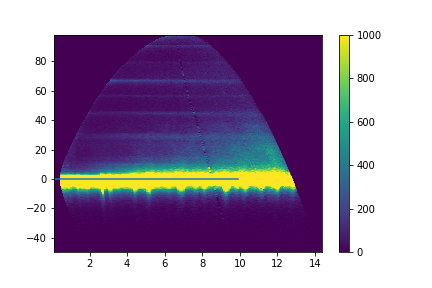

In [17]:
iqe = hh.load('/SNS/ARCS/2009_2_18_SCI/shared/C4H2I2S/C4H2I2S_50K_100meV/iqe_n_c_m3_C4H2I2S_50K_100meV.h5')
plt.figure()
sqe.plot(iqe)
plt.clim(0, 1000)

In [10]:
sim = use_ConstantQEKernel.Sim(
    workdir = "/SNS/users/lj7/dv/PyChop/SNS/mcvine-res-Ei_100",
    beamdir = "/SNS/users/lj7/simulations/ARCS/beam/100meV-n1e10-Fermi_600-T0_120-2018/",
    Ei = 100,
    Q = 5.6,
    dQ_axis = (-1, 1, 0.02),
    dE_axis = (-30, 20, 0.2),
    ncount = 1e7,
    nodes = 20
)

## Test one E

In [11]:
%%time
sim.run(E=0.)

/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


In [12]:
ls -l {sim.workdir}/out

total 1
-rw-r--r-- 1 lj7 users 21914 Aug 13 14:08 ie-Q_5.6-E_0.0.h5
-rw-r--r-- 1 lj7 users 54398 Aug 13 14:08 iqe-Q_5.6-E_0.0.h5


<IPython.core.display.Javascript object>


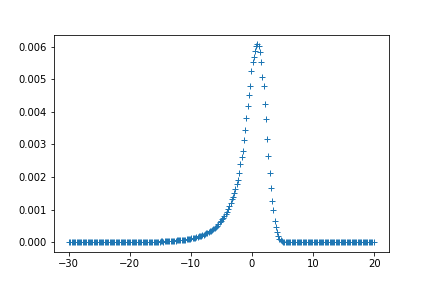

In [18]:
hist = hh.load(os.path.join(sim.outdir, 'ie-Q_5.6-E_0.0.h5'))
plt.figure()
plt.plot(hist.E, hist.I, '+')

## Run all Es

In [19]:
%%time
for E in np.arange(-90., 100.-1, 10.):
    if os.path.exists(os.path.join(sim.outdir, 'iqe-Q_5.6-E_%s.h5' % E)): continue
    print E
    sim.run(E)

-90.0
-80.0
-70.0
-60.0
-50.0
-40.0
-30.0
-20.0
-10.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
CPU times: user 1.01 s, sys: 245 ms, total: 1.26 s
Wall time: 2h 48min 11s


In [20]:
ls {sim.outdir}

ie-Q_5.6-E_0.0.h5    ie-Q_5.6-E_-70.0.h5   iqe-Q_5.6-E_-40.0.h5
ie-Q_5.6-E_-10.0.h5  ie-Q_5.6-E_70.0.h5    iqe-Q_5.6-E_40.0.h5
ie-Q_5.6-E_10.0.h5   ie-Q_5.6-E_-80.0.h5   iqe-Q_5.6-E_-50.0.h5
ie-Q_5.6-E_-20.0.h5  ie-Q_5.6-E_80.0.h5    iqe-Q_5.6-E_50.0.h5
ie-Q_5.6-E_20.0.h5   ie-Q_5.6-E_-90.0.h5   iqe-Q_5.6-E_-60.0.h5
ie-Q_5.6-E_-30.0.h5  ie-Q_5.6-E_90.0.h5    iqe-Q_5.6-E_60.0.h5
ie-Q_5.6-E_30.0.h5   iqe-Q_5.6-E_0.0.h5    iqe-Q_5.6-E_-70.0.h5
ie-Q_5.6-E_-40.0.h5  iqe-Q_5.6-E_-10.0.h5  iqe-Q_5.6-E_70.0.h5
ie-Q_5.6-E_40.0.h5   iqe-Q_5.6-E_10.0.h5   iqe-Q_5.6-E_-80.0.h5
ie-Q_5.6-E_-50.0.h5  iqe-Q_5.6-E_-20.0.h5  iqe-Q_5.6-E_80.0.h5
ie-Q_5.6-E_50.0.h5   iqe-Q_5.6-E_20.0.h5   iqe-Q_5.6-E_-90.0.h5
ie-Q_5.6-E_-60.0.h5  iqe-Q_5.6-E_-30.0.h5  iqe-Q_5.6-E_90.0.h5
ie-Q_5.6-E_60.0.h5   iqe-Q_5.6-E_30.0.h5


<IPython.core.display.Javascript object>


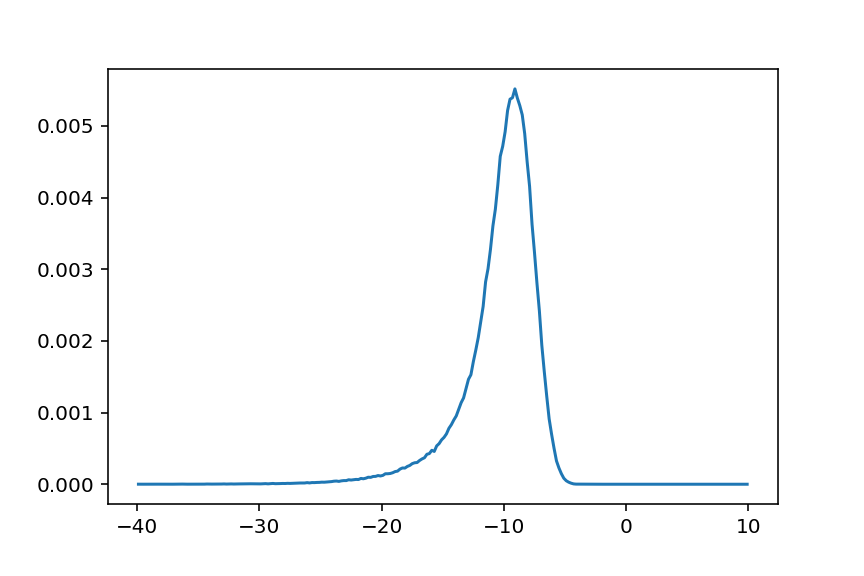

In [22]:
ie = hh.load(os.path.join(sim.outdir, 'ie-Q_5.6-E_-10.0.h5'))
plt.figure()
plt.plot(ie.E, ie.I)